In [12]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) #Huge precision - plenty of work could be done.

#Flat space runs with 128 bits for the BigFloat, but a normal Float64 does not seem to work.
#Higher amounts of precision are needed to see all of the ringdown.

# T=Float64;

include("FlatTimeStepExpr.jl")
include("FlatCoeffExpr.jl")
include("CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

In [13]:


Ndom = 6;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(0);
zmax = T(.55);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

DS0(t) = T(1.);
DS1(t) = T(0.);
DS2(t) = T(0.);
DS3(t) = T(0.);
DS4(t) = T(0.);

In [14]:
InitGuess = zeros(T,NVar,N);

# AHind = Int64(30);
zAH = T(0.5);
X = T(0.);
p2 = 0;
inita4 = T(-50);
tinit = T(0);
M  = T(1);
margin = 10;


In [15]:
# Computing the initial values of the fields, in particular of ξ(t_0)

X = T(0.);
Var = copy(InitGuess);
for ii in 1:500
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit,margin);
    print("\rX = $X")
    flush(stdout)
end

X = 0.751708319363275871109529948081941482344305000120305447893261822714350687237737599352735863769038168353379933651074392751886465371190993574413095045714007255

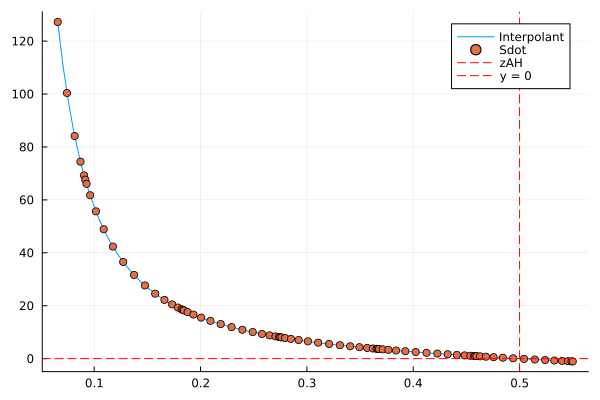

In [16]:
fig = PlotSdot(Var, X, 0,10)

In [17]:
initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-40);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);
InitVar = ComputeBulk(InitGuess[1,1:N], initX, inita4,0);

In [18]:
dt=.001;
tinit = zero(T);

outfile = open("FlatOutputA4100.bin","w");
monitorfile = open("FlatMonitorA4100.bin","w");

VarFinal, XFinal, a4Final = Evolve(InitVar, initX, inita4, tinit , 4, dt, 10, outfile, monitorfile)

close(outfile);
close(monitorfile);

◑ time = 4.000, constraint violation = 0.001    Time: 0:09:06

In [19]:
using Serialization

open("FlatInitialCondition.dat","w") do io
    serialize(io, [XFinal, a4Final, VarFinal]);
end